This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

# Let's see how "Quality" of Data Matters

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
%%time
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255


train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

CPU times: user 3.97 s, sys: 991 ms, total: 4.96 s
Wall time: 7.67 s


In [3]:
train_images.shape

(60000, 784)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.23270145, 0.72383197,
       0.34889124])

In [6]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [7]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [8]:
%%time

NEPOCHS = 5
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 7s 4ms/step - loss: 0.2971 - accuracy: 0.9148 - val_loss: 0.1669 - val_accuracy: 0.9517
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.1253 - accuracy: 0.9642 - val_loss: 0.1128 - val_accuracy: 0.9685
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9762 - val_loss: 0.0920 - val_accuracy: 0.9718
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9835 - val_loss: 0.0951 - val_accuracy: 0.9715
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0790 - val_accuracy: 0.9771
Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.6183 - accuracy: 0.8111 - val_loss: 0.2751 - val_accuracy: 0.9194
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 0.2682 - accuracy: 0.9174 - val_loss: 0.2048 - val_accuracy: 0.9359
Epoch 3/5
375

**Plotting a validation accuracy comparison**

CPU times: user 27.5 ms, sys: 3.05 ms, total: 30.5 ms
Wall time: 29.9 ms


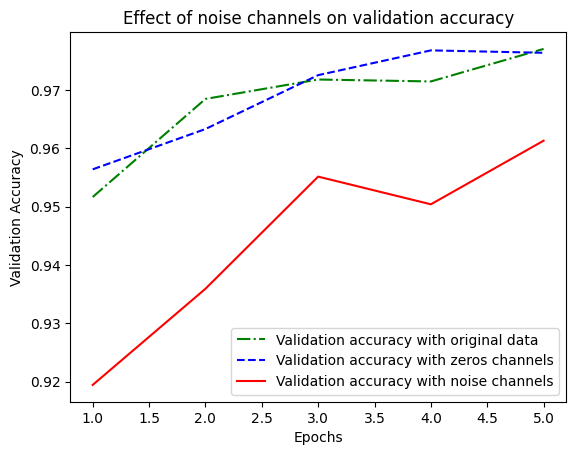

In [9]:
%%time
import matplotlib.pyplot as plt
val_acc_orig = history.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, (NEPOCHS+1))

plt.plot(epochs, val_acc_orig, "g-.",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_noise, "r-",
         label="Validation accuracy with noise channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [10]:
%%time

NEPS = 25
BATCH_SZ = 512

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=NEPS,
          batch_size=BATCH_SZ,
          validation_split=0.2)

Epoch 1/25
94/94 [==============================] - 1s 7ms/step - loss: 2.3249 - accuracy: 0.1029 - val_loss: 2.3116 - val_accuracy: 0.1013
Epoch 2/25
94/94 [==============================] - 0s 5ms/step - loss: 2.2975 - accuracy: 0.1201 - val_loss: 2.3093 - val_accuracy: 0.1056
Epoch 3/25
94/94 [==============================] - 1s 6ms/step - loss: 2.2866 - accuracy: 0.1314 - val_loss: 2.3133 - val_accuracy: 0.1037
Epoch 4/25
94/94 [==============================] - 1s 6ms/step - loss: 2.2743 - accuracy: 0.1436 - val_loss: 2.3194 - val_accuracy: 0.0998
Epoch 5/25
94/94 [==============================] - 0s 5ms/step - loss: 2.2620 - accuracy: 0.1532 - val_loss: 2.3225 - val_accuracy: 0.1040
Epoch 6/25
94/94 [==============================] - 1s 6ms/step - loss: 2.2471 - accuracy: 0.1680 - val_loss: 2.3292 - val_accuracy: 0.1077
Epoch 7/25
94/94 [==============================] - 1s 6ms/step - loss: 2.2324 - accuracy: 0.1801 - val_loss: 2.3385 - val_accuracy: 0.1047
Epoch 8/25
94/94 [==

In [11]:
%%time
val_acc = history.history["val_accuracy"]
print(len(val_acc))


val_loss = history.history["val_loss"]
print(len(val_loss))

val_loss
# history.history

25
25
CPU times: user 1.36 ms, sys: 0 ns, total: 1.36 ms
Wall time: 2.33 ms


[2.311556577682495,
 2.309250593185425,
 2.3133277893066406,
 2.3193578720092773,
 2.3225107192993164,
 2.3291513919830322,
 2.338454484939575,
 2.352231025695801,
 2.3508048057556152,
 2.3654839992523193,
 2.373596429824829,
 2.3843729496002197,
 2.3963143825531006,
 2.40317964553833,
 2.4294328689575195,
 2.4456355571746826,
 2.459901809692383,
 2.466813564300537,
 2.4830095767974854,
 2.5097761154174805,
 2.5170865058898926,
 2.5433566570281982,
 2.5418155193328857,
 2.5763165950775146,
 2.5972704887390137]

CPU times: user 27.6 ms, sys: 0 ns, total: 27.6 ms
Wall time: 28 ms


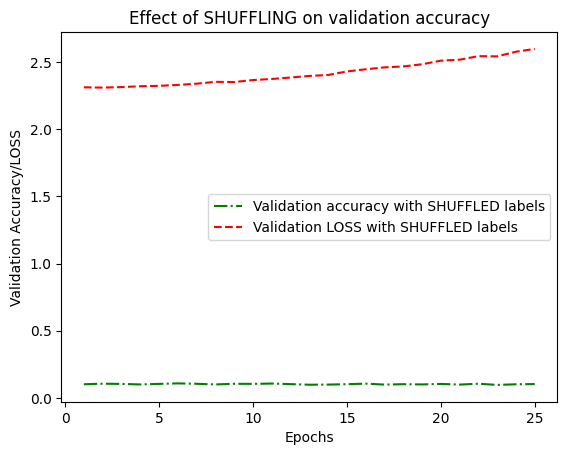

In [12]:
%%time
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
epochs = range(1, (NEPS+1))

plt.plot(epochs, val_acc, "g-.",
         label="Validation accuracy with SHUFFLED labels")
plt.plot(epochs, val_loss, "r--",
         label="Validation LOSS with SHUFFLED labels")
plt.title("Effect of SHUFFLING on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy/LOSS")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## 5.3 Improving model fit

Keep an eye out for the following when you’re choosing an evaluation protocol:

Data representativeness—You want both your training set and test set to be representative of the data at hand. For instance, if you’re trying to classify images of digits, and you’re starting from an array of samples where the samples are ordered by their class, taking the first 80% of the array as your training set and the remaining 20% as your test set will result in your training set containing only classes 0–7, whereas your test set will contain only classes 8–9. This seems like a ridiculous mistake, but it’s surprisingly common. For this reason, you usually should randomly shuffle your data before splitting it into training and test sets.

The arrow of time—If you’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), you should not randomly shuffle your data before splitting it, because doing so will create a temporal leak: your model will effectively be trained on data from the future. In such situations, you should always make sure all data in your test set is posterior to the data in the training set.

Redundancy in your data—If some data points in your data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, you’ll be testing on part of your training data, which is the worst thing you can do! Make sure your training set and validation set are disjoint.

Having a reliable way to evaluate the performance of your model is how you’ll be able to monitor the tension at the heart of machine learning—between optimization and generalization, underfitting and overfitting.

### Possible issues:

* Training doesn’t get started: your training loss doesn’t go down over time.
* Training gets started just fine, but your model doesn’t meaningfully generalize: you can’t beat the common-sense baseline you set.
* Training and validation loss both go down over time, and you can beat your baseline, but you don’t seem to be able to overfit, which indicates you’re still underfitting.


### 5.3.1 Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 471.6626 - accuracy: 0.3641 - val_loss: 2.2727 - val_accuracy: 0.2301
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0472 - accuracy: 0.2106 - val_loss: 2.4047 - val_accuracy: 0.1685
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5684 - accuracy: 0.1915 - val_loss: 2.4172 - val_accuracy: 0.1523
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 3.3349 - accuracy: 0.1847 - val_loss: 2.4094 - val_accuracy: 0.1703
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4909 - accuracy: 0.1987 - val_loss: 2.2135 - val_accuracy: 0.2192
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3749 - accuracy: 0.2221 - val_loss: 12.1227 - val_accuracy: 0.1999
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.6131 - accuracy: 0.2180 - val_loss: 2.1511 - val_accuracy: 0.2393
Epo

**The same model with a more appropriate learning rate**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3374 - accuracy: 0.9128 - val_loss: 0.1793 - val_accuracy: 0.9502
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1281 - accuracy: 0.9645 - val_loss: 0.1417 - val_accuracy: 0.9628
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0955 - accuracy: 0.9746 - val_loss: 0.1362 - val_accuracy: 0.9712
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0816 - accuracy: 0.9786 - val_loss: 0.1506 - val_accuracy: 0.9684
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9833 - val_loss: 0.1629 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9846 - val_loss: 0.1880 - val_accuracy: 0.9722
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.9866 - val_loss: 0.1780 - val_accuracy: 0.9743
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [15]:
%%time
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6758 - accuracy: 0.8314 - val_loss: 0.3612 - val_accuracy: 0.9046
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3538 - accuracy: 0.9019 - val_loss: 0.3107 - val_accuracy: 0.9148
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3177 - accuracy: 0.9116 - val_loss: 0.2923 - val_accuracy: 0.9178
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9157 - val_loss: 0.2828 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 0.9187 - val_loss: 0.2768 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.9205 - val_loss: 0.2735 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2803 - accuracy: 0.9215 - val_loss: 0.2716 - val_accuracy: 0.9250
Epoch 

In [16]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.07325023,  0.00653987,  0.07773089, ..., -0.07254809,
         -0.01376969, -0.03404623],
        [ 0.0080744 , -0.04414633, -0.07051203, ...,  0.05402467,
          0.02754243, -0.06450928],
        [-0.0222168 , -0.0336405 ,  0.00504298, ...,  0.00954843,
         -0.0386921 , -0.02465214],
        ...,
        [-0.04072505,  0.02053232,  0.01065661, ...,  0.05465343,
          0.08027381, -0.04647219],
        [ 0.02981766, -0.00577403,  0.02594684, ..., -0.08483909,
          0.00781775, -0.00342193],
        [ 0.04280274,  0.01304891,  0.01668456, ..., -0.06951928,
         -0.04508327,  0.03096959]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.5063198 ,  0.52182406,  0.12982433, -0.34064296,  0.06905734,
         1.2183355 , -0.2393305 ,  0.6314199 , -1.3120672 , -0.31463578],
       dtype=float32)>]

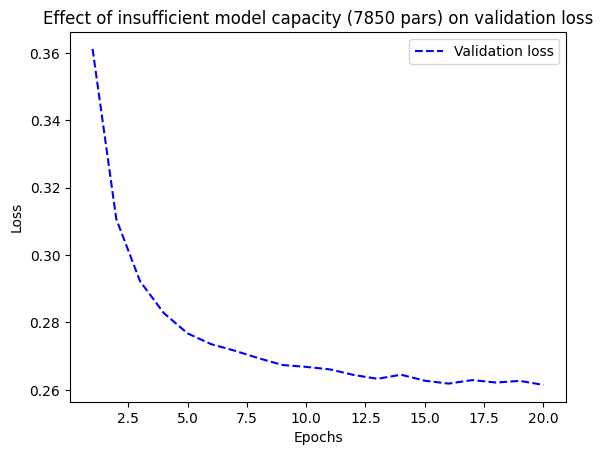

In [18]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity (7850 pars) on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [19]:
%%time
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3760 - accuracy: 0.8949 - val_loss: 0.1895 - val_accuracy: 0.9461
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1654 - accuracy: 0.9506 - val_loss: 0.1418 - val_accuracy: 0.9597
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1150 - accuracy: 0.9659 - val_loss: 0.1269 - val_accuracy: 0.9613
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9732 - val_loss: 0.1071 - val_accuracy: 0.9690
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0697 - accuracy: 0.9784 - val_loss: 0.1084 - val_accuracy: 0.9675
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.0926 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0874 - val_accuracy: 0.9743
Epoch 

In [20]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 96)                75360     
                                                                 
 dense_14 (Dense)            (None, 96)                9312      
                                                                 
 dense_15 (Dense)            (None, 10)                970       
                                                                 
Total params: 85642 (334.54 KB)
Trainable params: 85642 (334.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


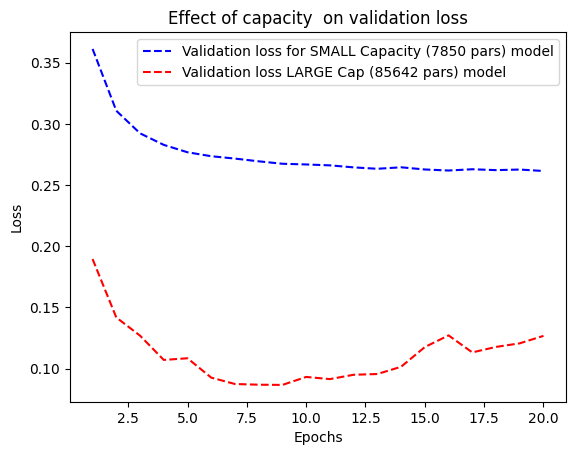

In [21]:
import matplotlib.pyplot as plt
val_loss_small = history_small_model.history["val_loss"]
val_loss_big = history_large_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_small, "b--", label="Validation loss for SMALL Capacity (7850 pars) model")
plt.plot(epochs, val_loss_big, "r--", label="Validation loss LARGE Cap (85642 pars) model")
plt.title("Effect of capacity  on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [22]:
%%time
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5901 - accuracy: 0.7205 - val_loss: 0.4907 - val_accuracy: 0.7815
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3915 - accuracy: 0.8770 - val_loss: 0.3683 - val_accuracy: 0.8731
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2866 - accuracy: 0.9110 - val_loss: 0.3082 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2265 - accuracy: 0.9281 - val_loss: 0.2933 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1897 - accuracy: 0.9398 - val_loss: 0.2785 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1589 - accuracy: 0.9517 - val_loss: 0.2836 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1392 - accuracy: 0.9557 - val_loss: 0.2930 - val_accuracy: 0.8849
Epoch 8/20
30

**Version of the model with lower capacity**

In [23]:
%%time
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.6414 - accuracy: 0.6535 - val_loss: 0.5984 - val_accuracy: 0.6841
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5624 - accuracy: 0.7711 - val_loss: 0.5507 - val_accuracy: 0.7902
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5148 - accuracy: 0.8279 - val_loss: 0.5179 - val_accuracy: 0.8374
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4702 - accuracy: 0.8679 - val_loss: 0.4812 - val_accuracy: 0.8201
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4153 - accuracy: 0.8989 - val_loss: 0.4267 - val_accuracy: 0.8696
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3528 - accuracy: 0.9201 - val_loss: 0.3716 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2910 - accuracy: 0.9297 - val_loss: 0.3340 - val_accuracy: 0.8823
Epoch 8/20
30

**Version of the model with higher capacity**

In [24]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5655 - accuracy: 0.7409 - val_loss: 0.5058 - val_accuracy: 0.7520
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3226 - accuracy: 0.8679 - val_loss: 0.2803 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2457 - accuracy: 0.8999 - val_loss: 0.2867 - val_accuracy: 0.8776
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1910 - accuracy: 0.9263 - val_loss: 0.2840 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1500 - accuracy: 0.9449 - val_loss: 0.2795 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1070 - accuracy: 0.9627 - val_loss: 0.2966 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0863 - accuracy: 0.9720 - val_loss: 0.3262 - val_accuracy: 0.8846
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [25]:
%%time
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 65ms/step - loss: 0.6285 - accuracy: 0.7686 - val_loss: 0.4895 - val_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4197 - accuracy: 0.8911 - val_loss: 0.3995 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3384 - accuracy: 0.9139 - val_loss: 0.3758 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3002 - accuracy: 0.9239 - val_loss: 0.3544 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2741 - accuracy: 0.9361 - val_loss: 0.3618 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2614 - accuracy: 0.9389 - val_loss: 0.3811 - val_accuracy: 0.8753
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2468 - accuracy: 0.9427 - val_loss: 0.3707 - val_accuracy: 0.8822
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [1]:
%%time
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

CPU times: user 3.16 s, sys: 669 ms, total: 3.83 s
Wall time: 7.58 s


#### Adding dropout

**Adding dropout to the IMDB model**

In [2]:
%%time
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

NameError: ignored

## Summary